# check the correspondence of different overlay samples

In [1]:
import sys; sys.path.insert(0, '../../../'); 
from ccqe_notebook_tools import * 
from mupClassification_notebooks import *
from onbeam_offbeam_notebooks import *
from Xsec_tools import *
%matplotlib inline

versions:
{   'Overlay': 'prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2',
    'beam off': 'prod_reco_optfilter_extbnb_v12_mcc8_dev',
    'beam on': 'prod_reco_optfilter_bnb_v12_unblind_mcc8',
    'data date': '2018_08_16',
    'overlay date': '2018_09_22'}
OffBeam_scaling: 0.706302660161 = N(on beam)/N(off beam) before SwT
f(POT): 0.051017899728 = N(POT on beam)/N(POT MC)


In [17]:
figures_path = '/Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/Xsec_extraction/'

## load mc and data

In [2]:
OverlaySamples = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
cuts_order  = ['no cut','Chi2Proton','Nflashes','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi']
reducedOverlay,pureffOverlay,pureffNumbers = apply_cuts_to_overlay(OverlaySamples=OverlaySamples,cuts_order=cuts_order)

285038 ccqe candidate pairs, 180092 in FV
74392 are 1mu-1p, 41.3%
55230 are other-pairs, 30.7%
155416 are cosmic, 86.3%
--------------------------------------------------------------
37228 are CC1p, 20.7%
I finished loading overlay samples. We have in total 285038 pairs


In [3]:
summary = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/summary/'
                              +versions['overlay date']+'/'
                              +versions['Overlay']+'_'+versions['overlay date']+'_summary.csv')
overlay_POT= np.sum(summary.POT)
f_POT_overlay = 4.908e+19/overlay_POT
print versions['Overlay'],'POT:',overlay_POT,',f_POT_detsys:',f_POT_overlay

prodgenie_bnb_nu_uboone_overlay_mcc8.11_reco2 POT: 9.620152978e+20 ,f_POT_detsys: 0.051017899728


In [5]:
versions['overlay date'] = '2018_08_16'
versions['Overlay'] = 'prodgenie_bnb_nu_cosmic_uboone_detsyst_withDIC_mcc8.11_reco'
OverlaySamples_detsyst_withDIC = load_samples(date=versions['overlay date'],filename=versions['Overlay']+'_'+versions['overlay date']+'_vertices')
cuts_order  = ['no cut','Chi2Proton','Nflashes','MatchedFlash','length','non-collinearity','vertex activity','delta phi','Pt & delta phi']
reducedOverlay_detsyst_withDIC,pureffOverlay_detsyst_withDIC,pureffNumbers_detsyst_withDIC = apply_cuts_to_overlay(OverlaySamples=OverlaySamples_detsyst_withDIC,cuts_order=cuts_order)

35618 ccqe candidate pairs, 24415 in FV
6889 are 1mu-1p, 28.2%
5352 are other-pairs, 21.9%
23407 are cosmic, 95.9%
--------------------------------------------------------------
3657 are CC1p, 15.0%
I finished loading overlay samples. We have in total 35618 pairs


In [6]:
versions['overlay date'] = '2018_08_16'
versions['Overlay'] = 'prodgenie_bnb_nu_cosmic_uboone_detsyst_withDIC_mcc8.11_reco'
summary = pd.read_csv('/Users/erezcohen/Desktop/uBoone/CCQEanalysis/csvFiles/summary/'
                              +versions['overlay date']+'/'
                              +versions['Overlay']+'_'+versions['overlay date']+'_summary.csv')
overlay_POT= np.sum(summary.POT)
f_POT_detsys = 4.908e+19/overlay_POT
print versions['Overlay'],'POT:',overlay_POT,',f_POT_detsys:',f_POT_detsys

prodgenie_bnb_nu_cosmic_uboone_detsyst_withDIC_mcc8.11_reco POT: 9.54392804e+19 ,f_POT_detsys: 0.514253667822


saved /Users/erezcohen/Desktop/Projects/uBoone/write-ups/XsecCCQE/Figures/overlay_8.11/Xsec_extraction/phi_mu_induced_charge_effect.pdf


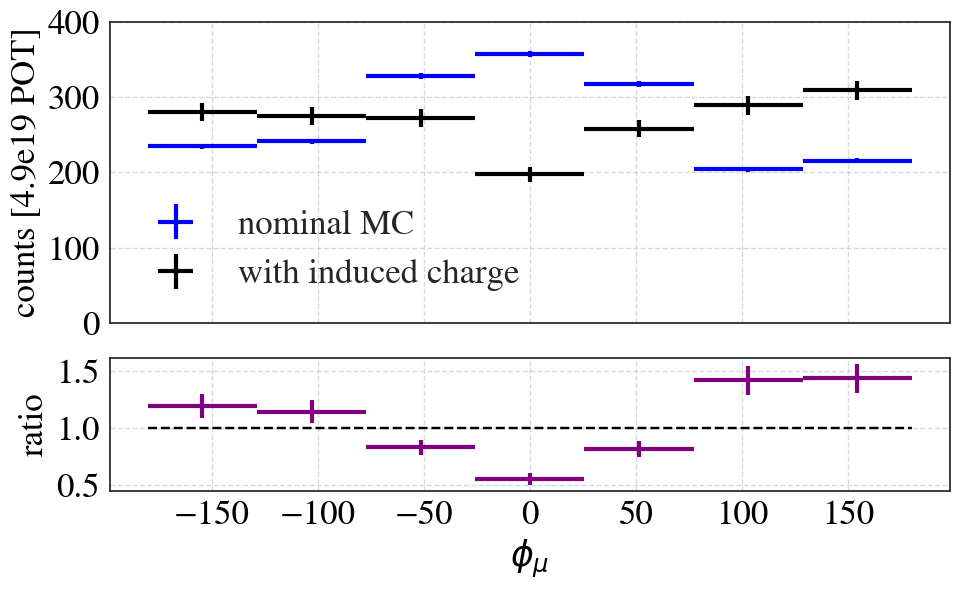

In [18]:
var,bins,mid,bin_width,vlabel,xlabel,units = get_labels(observable='phi(mu)')
fig=plt.figure(figsize=(9.7,6))
histo,herr = dict(),dict()
ax=fig.add_subplot(3,1,(1,2))
for CC1p,clabel,f_POT,color in zip([OverlaySamples['CC1p'],OverlaySamples_detsyst_withDIC['CC1p']]
                             ,['nominal MC','with induced charge']
                             ,[f_POT_overlay,f_POT_detsys],['blue','black']):
    histo[clabel],_ = np.histogram(180./np.pi*CC1p['reco_Pmu_mcs_phi'],bins=bins)
    herr[clabel] = np.sqrt(histo[clabel])
    histo[clabel] , herr[clabel] = histo[clabel]*f_POT , herr[clabel]*f_POT
    ax.errorbar(x=mid,xerr=0.5*bin_width,y=histo[clabel],yerr=herr[clabel]
                ,fmt='o',markersize=0,capsize=10,linewidth=3,color=color,label=clabel)
set_axes(ax,'','counts [4.9e19 POT]',remove_ticks_x=True,ylim=(0,400),yticks=(0,100,200,300,400),do_add_legend=True,do_add_grid=True)
# plt.legend(bbox_to_anchor=(1,1.05),loc=2,fontsize=25)

ratio = histo['with induced charge']/histo['nominal MC']
ratio_err = ratio*np.sqrt(1./histo['with induced charge']+1./histo['nominal MC'])

ax=fig.add_subplot(3,1,3)
ax.errorbar(x=mid,xerr=0.5*bin_width,y=ratio,yerr=ratio_err,fmt='o',markersize=0,capsize=10,linewidth=3,color='purple')
set_axes(ax,r'$\phi_\mu$','ratio',do_add_grid=True)
plt.plot([-180,180],[1,1],'--',color='black')
plt.tight_layout()
save_figure(figures_path+'phi_mu_induced_charge_effect.pdf')